### load the data in the file data/gapminder_lifeexpectancy.xlsx

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_excel('gapminder_lifeexpectancy.xlsx')
df1.info

<bound method DataFrame.info of            Life expectancy   1800   1801   1802   1803   1804   1805   1806  \
0                 Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1              Afghanistan  28.21  28.20  28.19  28.18  28.17  28.16  28.15   
2    Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                  Albania  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4                  Algeria  28.82  28.82  28.82  28.82  28.82  28.82  28.82   
..                     ...    ...    ...    ...    ...    ...    ...    ...   
255             Yugoslavia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
256                 Zambia  32.60  32.60  32.60  32.60  32.60  32.60  32.60   
257               Zimbabwe  33.70  33.70  33.70  33.70  33.70  33.70  33.70   
258                  Åland    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
259            South Sudan  26.67  26.67  26.67  26.67  26.67  26.67  26.67   

      1807   1808  

### select a year from the DataFrame

In [3]:
df1_1800 = df1[['Life expectancy',1800]]
# to create one column with same label with another Dataframe, we need to rename it
df1_1800.rename(columns={'Life expectancy':'country'},inplace=True)
df1_1800.info

/Users/Disalo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<bound method DataFrame.info of                    country   1800
0                 Abkhazia    NaN
1              Afghanistan  28.21
2    Akrotiri and Dhekelia    NaN
3                  Albania  35.40
4                  Algeria  28.82
..                     ...    ...
255             Yugoslavia    NaN
256                 Zambia  32.60
257               Zimbabwe  33.70
258                  Åland    NaN
259            South Sudan  26.67

[260 rows x 2 columns]>

### load the data in the file data/continents.csv

In [4]:
df2 = pd.read_csv('continents.csv', sep=';',index_col=None)
df2.info

<bound method DataFrame.info of          continent    country
0           Africa    Algeria
1           Africa     Angola
2           Africa      Benin
3           Africa   Botswana
4           Africa    Burkina
..             ...        ...
189  South America   Paraguay
190  South America       Peru
191  South America   Suriname
192  South America    Uruguay
193  South America  Venezuela

[194 rows x 2 columns]>

### merge both DataFrames

In [4]:
combined_df = pd.merge(left=df2, right=df1_1800, how='outer', on='country')
combined_df.info

<bound method DataFrame.info of     continent                country   1800
0      Africa                Algeria  28.82
1      Africa                 Angola  26.98
2      Africa                  Benin  31.00
3      Africa               Botswana  33.60
4      Africa                Burkina    NaN
..        ...                    ...    ...
273       NaN  Virgin Islands (U.S.)  33.40
274       NaN   North Yemen (former)    NaN
275       NaN   South Yemen (former)    NaN
276       NaN             Yugoslavia    NaN
277       NaN                  Åland    NaN

[278 rows x 3 columns]>

### remove all rows with empty values

In [5]:
combined_df.dropna('index',inplace=True)
combined_df.info

<bound method DataFrame.info of          continent    country   1800
0           Africa    Algeria  28.82
1           Africa     Angola  26.98
2           Africa      Benin  31.00
3           Africa   Botswana  33.60
5           Africa    Burundi  31.50
..             ...        ...    ...
189  South America   Paraguay  35.50
190  South America       Peru  35.70
191  South America   Suriname  32.90
192  South America    Uruguay  32.90
193  South America  Venezuela  32.20

[167 rows x 3 columns]>

### print the highest and lowest life expectancy for each continent

In [6]:
print({combined_df[1800].max():combined_df[1800].idxmax('country')})
print({combined_df[1800].min():combined_df[1800].idxmin('country')})

{42.85: 118}
{23.39: 97}


In [7]:
[combined_df.loc[[118]],combined_df.loc[[97]]]

[    continent  country   1800
 118    Europe  Iceland  42.85,
    continent country   1800
 97      Asia   Yemen  23.39]

### plot the numbers

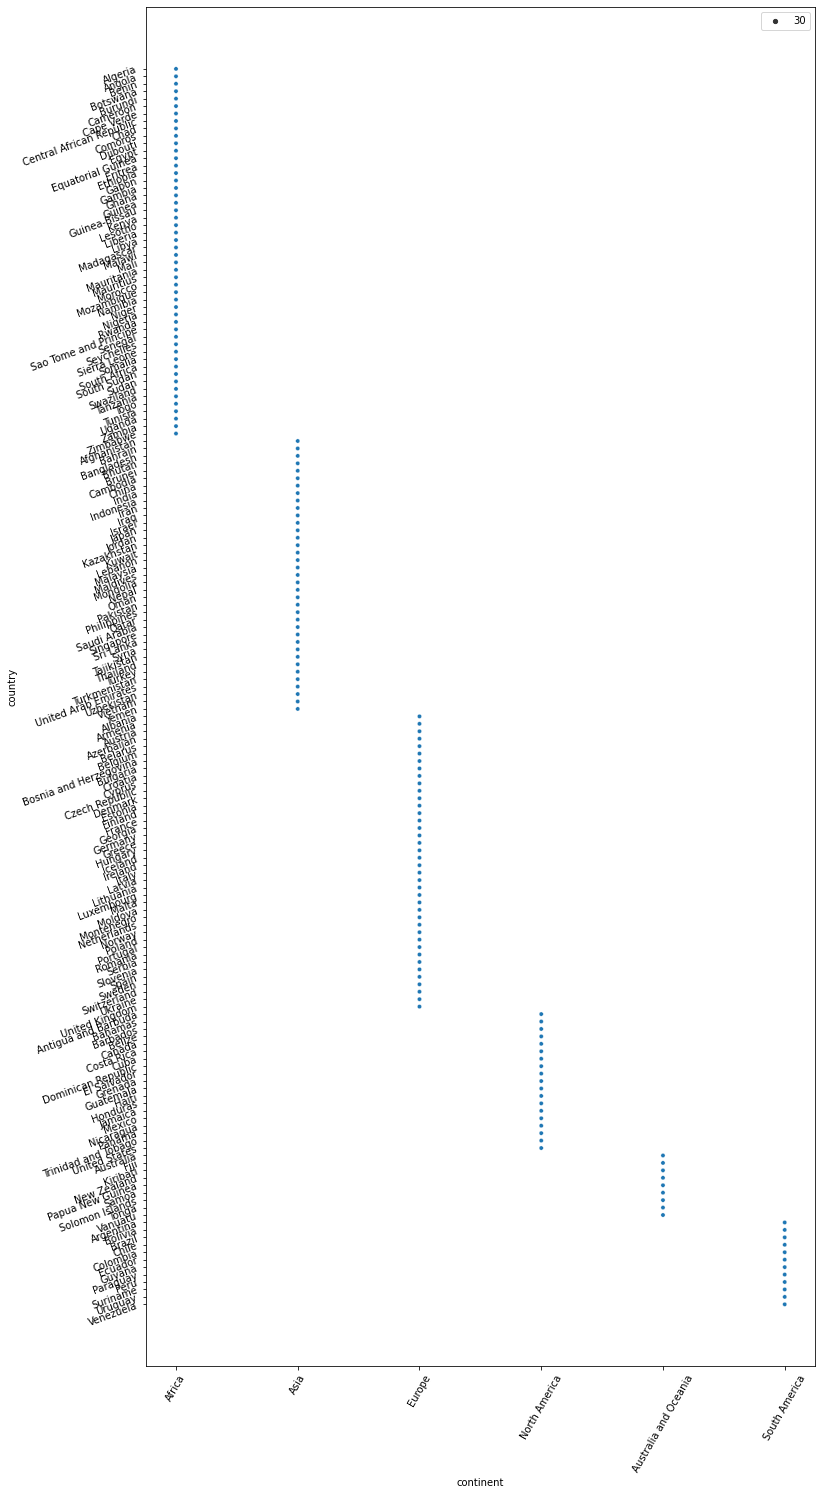

In [55]:
import seaborn as sns
plt.figure(figsize=(12,25))
ax = sns.scatterplot(x='continent', y='country', data=combined_df, size=30)
plt.xticks(rotation=60)
plt.yticks(rotation=20)
plt.show()